## Explore the creation of synthetic waves <mark>(Used in the article)</mark>

### Imports

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from src.wave_generator import WaveGenerator
import numpy as np 
import os

### Examples

#### Generate time series

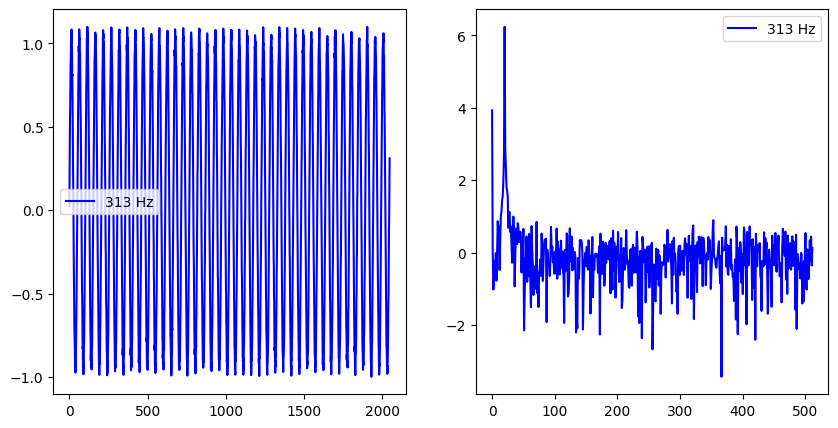

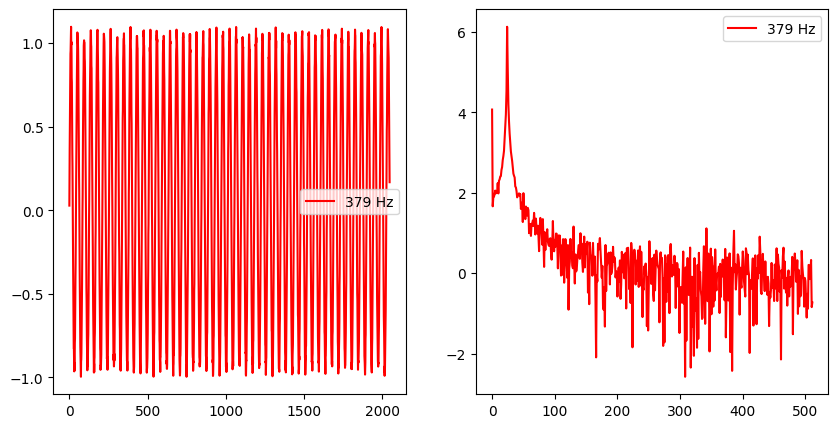

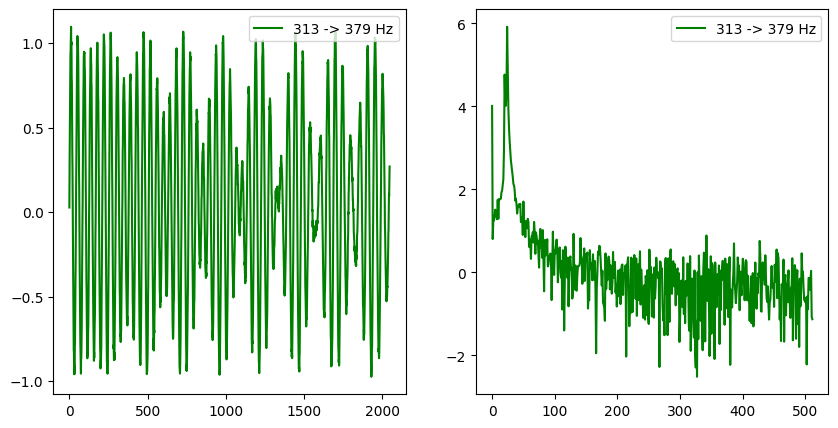

In [8]:
wg = WaveGenerator()

two_pi = 2*np.pi
time_serie_1 = wg.generate_time_series(angular_frequency=two_pi*313)
time_serie_2 = wg.generate_time_series(angular_frequency=two_pi*379)
time_serie_3 = wg.mixing_time_series(first_time_series=time_serie_1, second_time_series=time_serie_2)

wg.plot_wave(time_serie_1, label_hz='313 Hz' , w=1024)
wg.plot_wave(time_serie_2, label_hz='379 Hz', color='r', w=1024)
wg.plot_wave(time_serie_3, label_hz='313 -> 379 Hz', color='g', w=1024)


#### Plot function

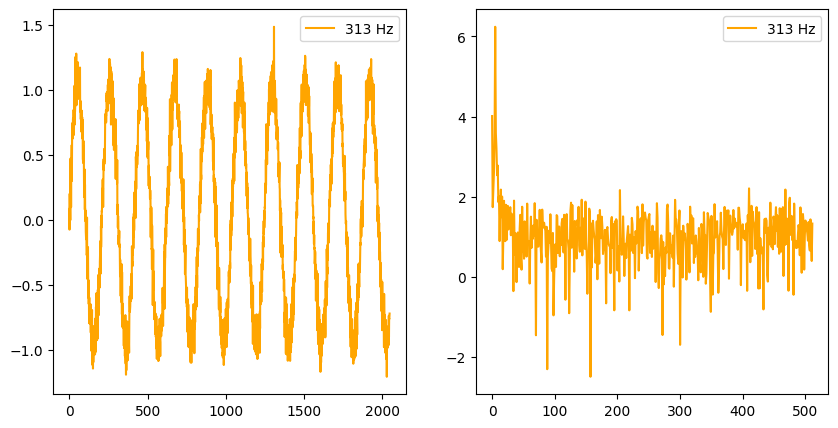

In [9]:
t = np.linspace(0, 10, 160000)
s1 = np.sin(2*np.pi*77*t) + 0.1*np.random.rand(len(t))

wg = WaveGenerator()
s1 = wg.add_noise([s1])[0]
wg.plot_wave(serie=s1, color='orange', label_hz='313 Hz', w=1024)


#### Generate .wav file


In [24]:
if not os.path.exists('data/toy_synthetic_machine'):
    os.mkdir('data/toy_synthetic_machine')

wg = WaveGenerator()
t = np.linspace(0, 100, 1600000)

toy_serie_1 = np.sin(2*np.pi*256*t) + 0.5 * np.random.rand(len(t))
wg.generate_wav_file(file_name = 'toy', folder_name='data/toy_synthetic_machine',serie = toy_serie_1 , sampling_rate = 8000, amount=1)

### Generate Synthetic Waves for models

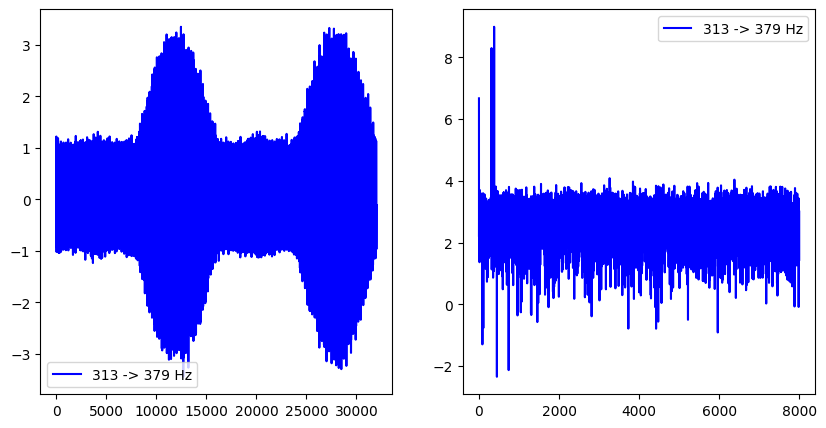

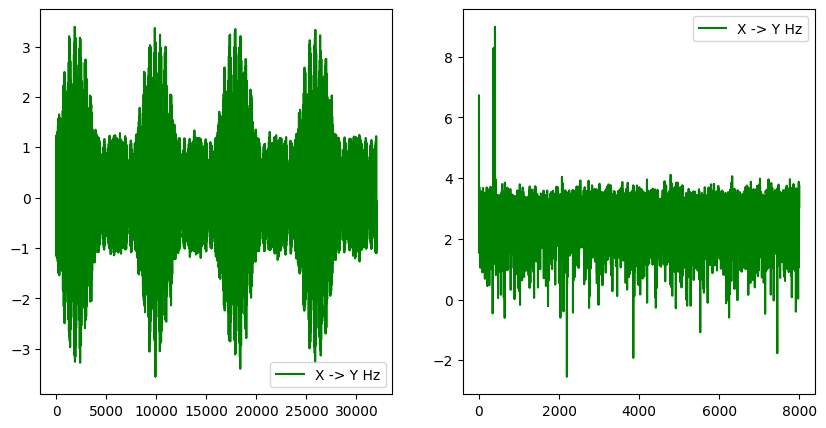

In [11]:
wg = WaveGenerator(data_number=16000000, stop=1000)

two_pi = 2*np.pi
time_serie_1 = wg.generate_time_series(angular_frequency=two_pi*313)
time_serie_1 = wg.add_noise([time_serie_1])[0]
time_serie_2 = wg.generate_time_series(angular_frequency=two_pi*379)
time_serie_2 = wg.add_noise([time_serie_2])[0]
normal_time_serie = wg.mixing_time_series(first_time_series=time_serie_1, second_time_series=time_serie_2)

wg.plot_wave(normal_time_serie, label_hz='313 -> 379 Hz', color='b')

three_pi = -4*np.pi
time_serie_1 = wg.generate_time_series(angular_frequency=two_pi*370)
time_serie_1 = wg.add_noise([time_serie_1])[0]
time_serie_2 = wg.generate_time_series(angular_frequency=two_pi*400)
time_serie_2 = wg.add_noise([time_serie_2])[0]
abormal_time_serie = wg.mixing_time_series(first_time_series=time_serie_1, second_time_series=time_serie_2, coeficient_pi=three_pi)
wg.plot_wave(abormal_time_serie, label_hz='X -> Y Hz', color='g')

if not os.path.exists('data/synthetic_machine'):
    os.mkdir('data/synthetic_machine')

if not os.path.exists('data/synthetic_machine/id_00'):
    os.mkdir('data/synthetic_machine/id_00')

wg.generate_wav_file(file_name = 'sound', folder_name='data/synthetic_machine/id_00/normal',serie = normal_time_serie , sampling_rate = 16000, amount=100)
wg.generate_wav_file(file_name = 'sound', folder_name='data/synthetic_machine/id_00/abnormal',serie = abormal_time_serie , sampling_rate = 16000, amount=100)